In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import emoji

In [2]:
file = open(r'whatsapp_conv.txt',mode='r',encoding="utf8")
data = file.read()
file.close()

In [3]:
data_line = data.splitlines() #read text line by line
df = pd.DataFrame({'index':[i for i in range(len(data_line))], 'text':data_line}) #creating a data frame which includes text row and index

In [4]:
#getting index of deleted rows
deleted_cols = []
for i in range(len(df)-1):
    if df["text"][i].find("‎Location:")!=-1 or df["text"][i].find("https:")!=-1:
        deleted_cols.append(df["index"][i])

In [5]:
#deleting rows which includes Location and https: strings
for i in deleted_cols:
    df=df.drop(i)

In [6]:
#removing the following characters in data
data = str(df["text"].to_list())
data = data.replace(",","")
data = data.replace("\'", "")
data = data.replace("\\", "")

In [7]:
#getting sender pattern on data by using following regular expression
pattern = re.compile('\d+.\d+.\d+\s+\d+:+\d+:+\d+\s+([a-zA-Z0-9]+\s?[a-zA-Z0-9]+\s?[a-zA-Z0-9]+\s?):')
messengers = re.findall(pattern,data)

In [8]:
#counts of text which is sender based
sender_cnt = pd.DataFrame({'sender':messengers})
sender = sender_cnt['sender'].value_counts()
dict(sender)

{'Yasemin Senlik': 13420, 'Azal': 13306}

In [9]:
#getting hour pattern on data by using following regular expression 
hour_pattern = '\d+:+\d+:\d+'
hour = re.findall(hour_pattern,data)

In [10]:
#getting date pattern on data by using following regular expression
date_pattern = '\d+.\d+.\d{4}'
date = re.findall(date_pattern,data)

In [11]:
date_new=[]
for i in date:
    if len(i)==9 or len(i)==10:
        date_new.append(i)

In [12]:
#unique dates
date_new_unq = list(set(date_new))

In [13]:
#counts of text which is date based
date_cnt = pd.DataFrame({'date':date_new})
dates = date_cnt['date'].value_counts()
dates.head(5)


13.11.2019    439
13.03.2020    399
15.04.2020    377
10.03.2020    320
18.11.2019    316
Name: date, dtype: int64

In [14]:
month=[]
cnt =0
for i in range(len(date_new)):
    if i == 616 or i ==888 or i==10951:
        continue
    else:
        month.append(date_new[i].split(".")[1])
        

In [15]:
#counts of text which is month based
month_cnt = pd.DataFrame({'month':month})
months = month_cnt['month'].value_counts()
months.head(3)

03    6080
04    5321
11    4025
Name: month, dtype: int64

In [17]:
hours_new = []
for i in range(0,len(hour)-1):
    hours_new.append(hour[i][0:2])
    

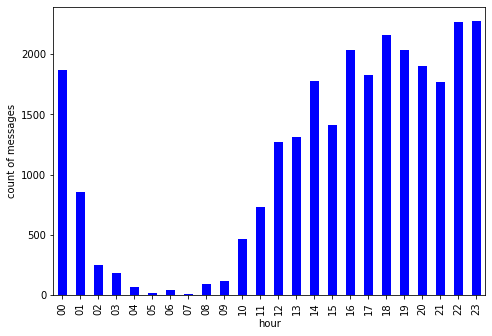

In [18]:
##counts of text which is hour based
time = pd.DataFrame({'hours':hours_new})
hours = time['hours'].value_counts()
hours.sort_index(inplace=True)
plt.axes([0,0,1,1])
hours.plot.bar(color='b', width=0.5)
plt.xlabel('hour')
plt.ylabel('count of messages')
plt.show()

In [19]:
hours.sort_values(ascending=False).head(5)

23    2277
22    2266
18    2158
16    2035
19    2032
Name: hours, dtype: int64

In [20]:
def extract_emojis(str):
  return ''.join(c for c in str if c in emoji.UNICODE_EMOJI)

In [21]:
emojis = list(extract_emojis(data))

In [22]:
#top 5 of emojis
emojis_new = pd.DataFrame({'emojis':emojis})
emojis_value_count = emojis_new['emojis'].value_counts()
emojis_value_count.sort_values(ascending=False).head(5)

😘    614
😂    572
🙄    539
😐    224
😕    136
Name: emojis, dtype: int64

In [23]:
data_split=data.split()

In [24]:
#creating new data without hour
new_data=[]
for i in data_split:
    if i not in hour:
        new_data.append(i)

In [25]:
#creating new data without date
new_data_without_date = []
for i in new_data:
    if i not in date_new_unq:
        new_data_without_date.append(i) 

In [26]:
from nltk.corpus import stopwords
stop_words =set(stopwords.words('english'))

In [27]:
#all words are lower case
new_data_low = [word.lower() for word in new_data_without_date ]

In [28]:
#removing stop words
new_data_filtered = [word for word in new_data_low if word not in stop_words]

In [29]:
#word counts
word_cnt = pd.DataFrame({'word':new_data_filtered})
word_cnt = word_cnt[word_cnt["word"]!="omitted"]
word_cnt = word_cnt[word_cnt["word"]!="u200eimage"]
words = word_cnt['word'].value_counts()
words[3:].head(10)

u         1460
gonna     1163
babe      1092
good       721
home       639
go         607
love       568
miss       528
that’s     526
:)         518
Name: word, dtype: int64